In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:>

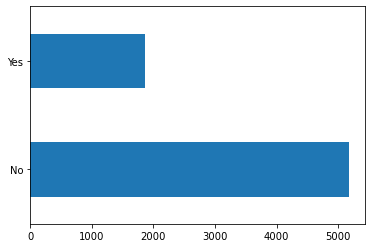

In [7]:
df['Churn'].value_counts().plot(kind='barh')

In [8]:
(df['Churn'].value_counts()/len(df['Churn']))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df1=df.copy()

In [11]:

df.TotalCharges= pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.dropna(how='any',inplace = True)

In [13]:
print(df['tenure'].max())

72


In [14]:
labels=["{0} -{1}".format(i,i+11) for i in range(1,72,12)]

df['tenure_group']= pd.cut(df.tenure,range(1,80,12),right=False, labels=labels)

In [15]:
df.drop(['tenure','customerID',],axis=1,inplace=True)



In [16]:
df['tenure_group']

0        1 -12
1       25 -36
2        1 -12
3       37 -48
4        1 -12
         ...  
7038    13 -24
7039    61 -72
7040     1 -12
7041     1 -12
7042    61 -72
Name: tenure_group, Length: 7032, dtype: category
Categories (6, object): ['1 -12' < '13 -24' < '25 -36' < '37 -48' < '49 -60' < '61 -72']

#Data Exploration

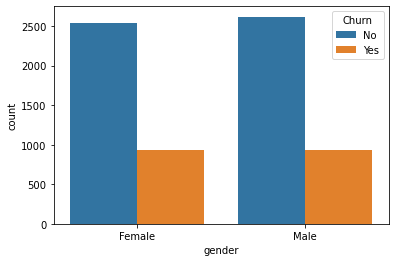

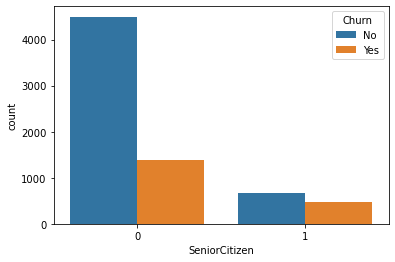

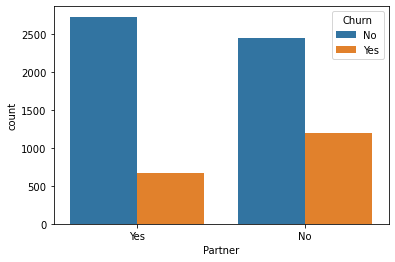

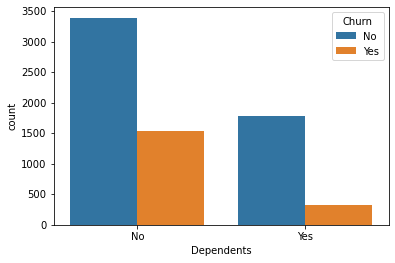

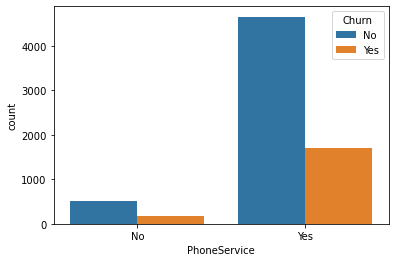

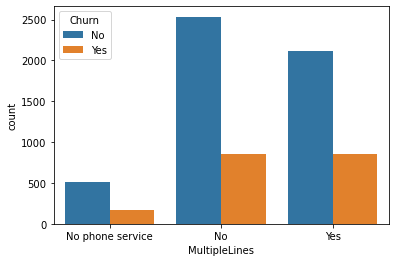

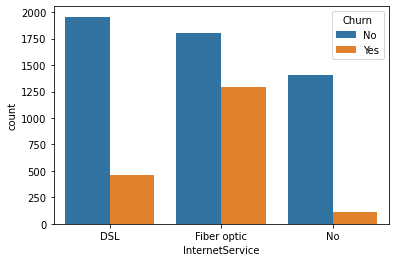

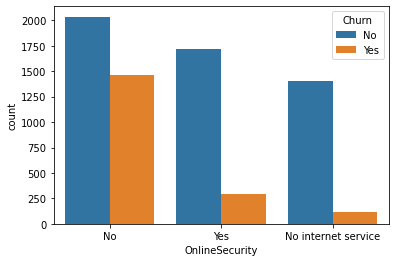

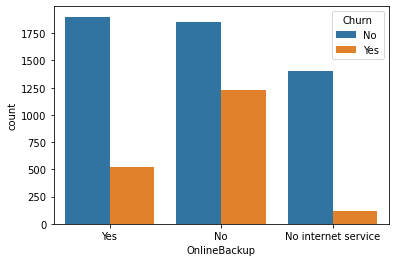

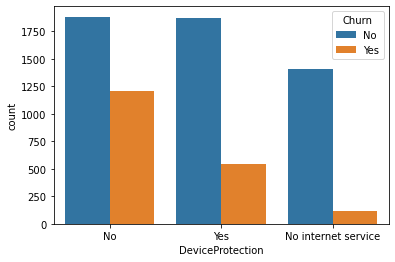

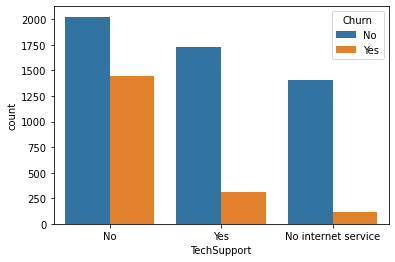

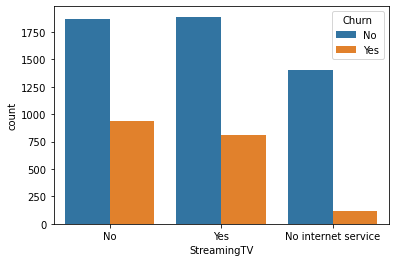

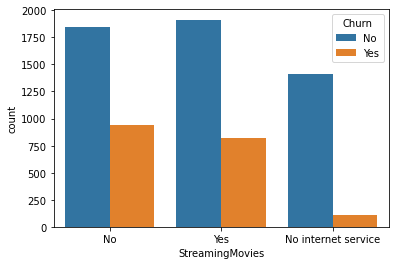

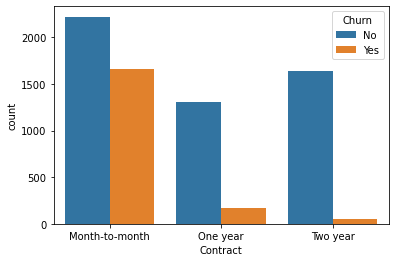

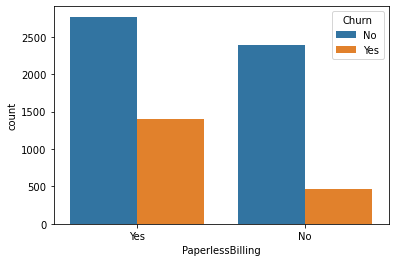

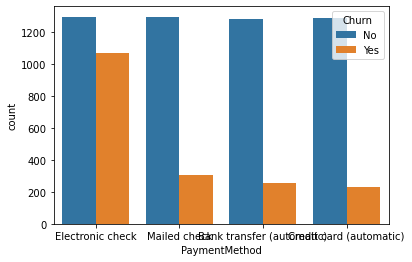

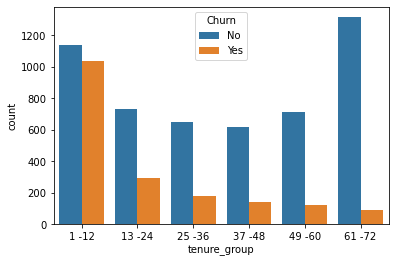

In [17]:
for i,predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue='Churn')

In [18]:
df['Churn']= np.where(df.Churn=='Yes',1,0)

In [19]:
df_dummy=pd.get_dummies(df)
df_dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 -12,tenure_group_13 -24,tenure_group_25 -36,tenure_group_37 -48,tenure_group_49 -60,tenure_group_61 -72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<AxesSubplot:>

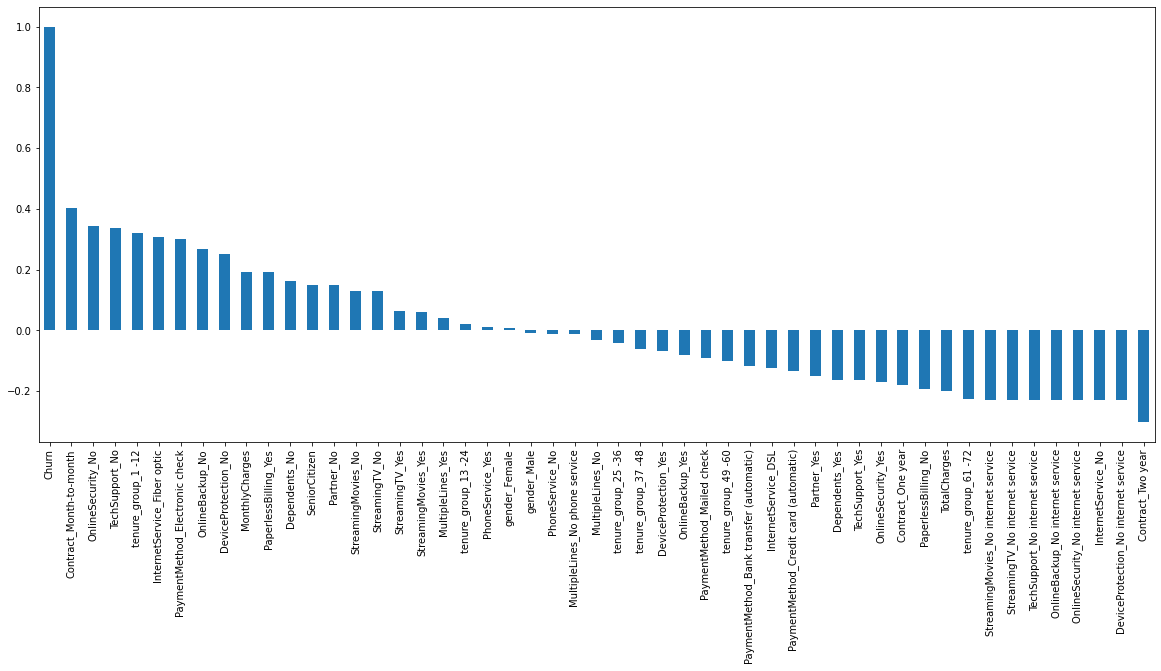

In [20]:
plt.figure(figsize=(20,8))
df_dummy.corr()['Churn'].sort_values(ascending =False).plot(kind='bar')

In [21]:
df_dummy.corr()['Churn'].sort_values(ascending =False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
tenure_group_1 -12                         0.319628
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
tenure_group

In [22]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [23]:
df_dummy.shape

(7032, 51)

In [24]:
X= df_dummy.drop(['Churn'],axis=1)
Y=df_dummy['Churn']

In [25]:
X_train,x_test,Y_train,y_test= train_test_split(X,Y,random_state=40,test_size=0.2)

In [26]:
model_dc=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6, min_samples_leaf=8)

In [27]:
model_dc.fit(X,Y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [28]:
y_pred= model_dc.predict(x_test)

In [29]:
model_dc.score(x_test,y_pred)

1.0

In [30]:
from sklearn.metrics import confusion_matrix



In [31]:
confusion_matrix(y_test,y_pred)

array([[924, 126],
       [171, 186]], dtype=int64)

In [32]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1050
           1       0.60      0.52      0.56       357

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [33]:
pip install imblearn


In [36]:
from imblearn.combine import SMOTEENN

In [37]:
sm=SMOTEENN()

In [41]:
x_smot,y_smote=sm.fit_resample(X,Y)

In [46]:
xr_train,xr_test,yr_train,yr_test= train_test_split(x_smot,y_smote,random_state=40,test_size=0.2)

In [47]:
model_dc_sm=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6, min_samples_leaf=8)

In [48]:
model_dc_sm.fit(x_smot,y_smote)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [49]:
 yr_pred=model_dc_sm.predict(xr_test)

In [50]:
confusion_matrix(yr_test,yr_pred)

array([[462,  53],
       [ 15, 657]], dtype=int64)

In [51]:
print(metrics.classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       515
           1       0.93      0.98      0.95       672

    accuracy                           0.94      1187
   macro avg       0.95      0.94      0.94      1187
weighted avg       0.94      0.94      0.94      1187



In [52]:
import pickle

In [53]:
filename='model_churn.sav'

In [54]:
pickle.dump(model_dc_sm,open(filename,'wb'))

In [55]:
load=pickle.load(open(filename,'rb'))

In [56]:
load.score(xr_test,yr_test)

0.9427127211457456